In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle
from skimage.transform import resize
from glob import glob
from sklearn.model_selection import train_test_split
import tensorflow_hub as hub
from tensorflow.keras import Sequential, layers, applications
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
with_mask=glob('with_mask 1/with_mask 1/*.jpg')
without_mask=glob('without_mask/without_mask/*.jpg')

In [4]:
classes={0:'with_mask',1:'without_mask'}

In [5]:
images=[]
labels=[]

for i in with_mask:
    img=plt.imread(i)
    images.append(img)
    labels.append(0)
    
for i in without_mask:
    img=plt.imread(i)
    images.append(img)
    labels.append(1)

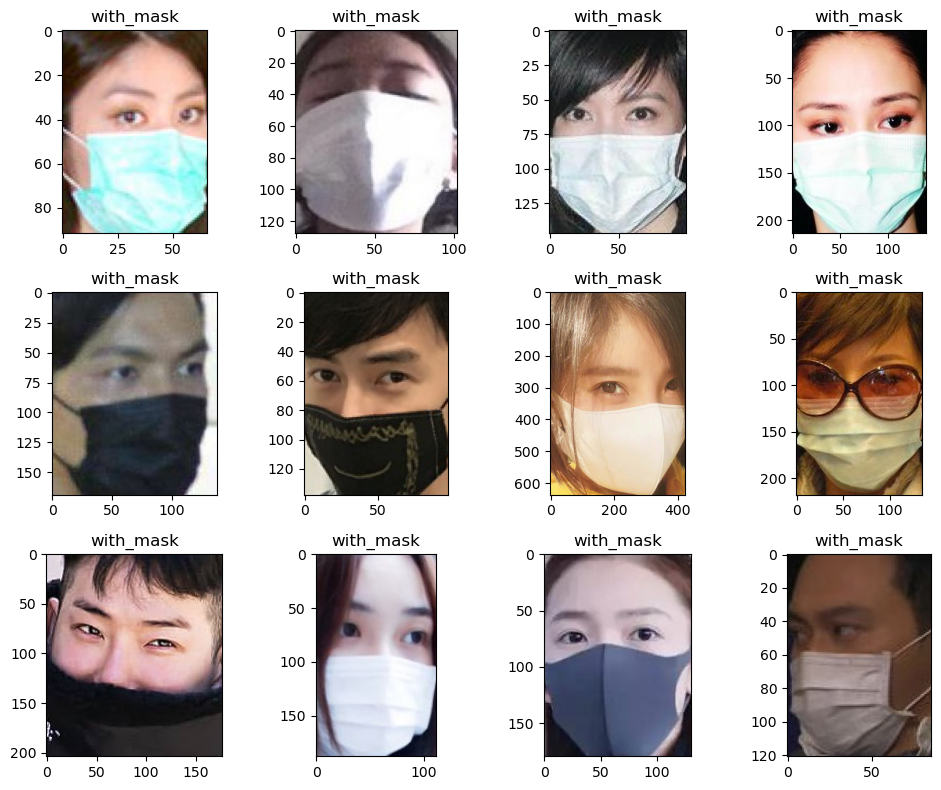

In [6]:
plt.figure(figsize=(10,8))
for i in range(12):
    plt.subplot(3,4,i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(classes[labels[i]])
plt.tight_layout()

In [7]:
images,labels=shuffle(images,labels)

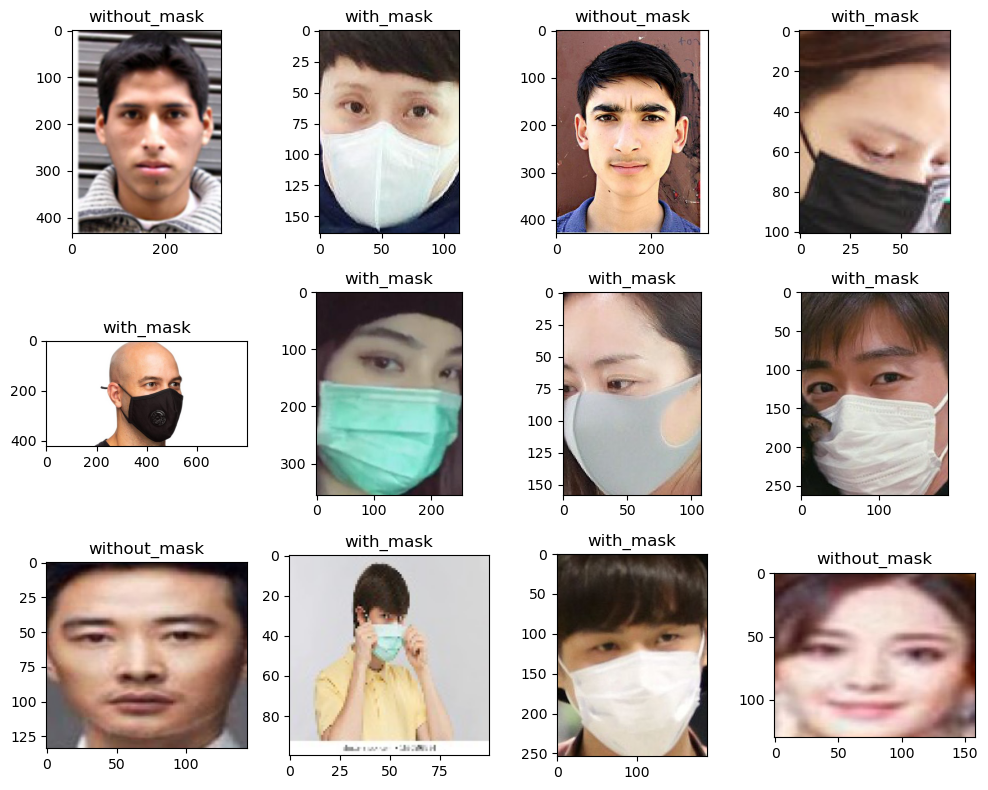

In [8]:
plt.figure(figsize=(10,8))
for i in range(12):
    plt.subplot(3,4,i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(classes[labels[i]])
plt.tight_layout()

In [9]:
X=[]
for i in images:
    X.append(resize(i,(224,224,3)))

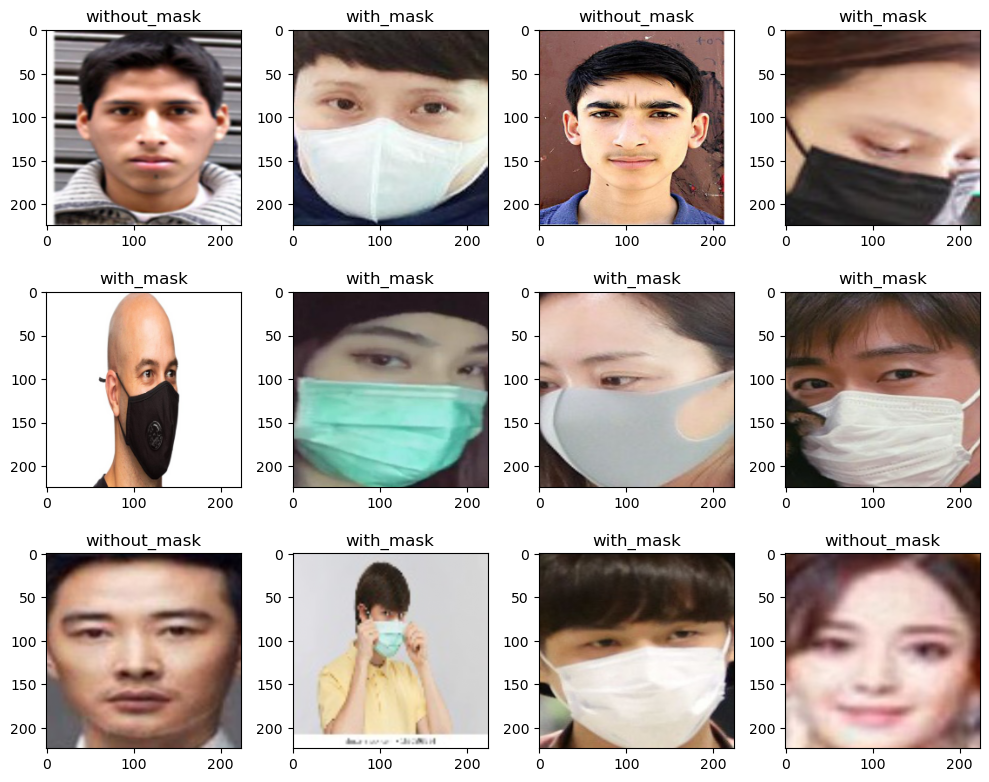

In [10]:
plt.figure(figsize=(10,8))
for i in range(12):
    plt.subplot(3,4,i+1)
    plt.imshow(X[i], cmap='gray')
    plt.title(classes[labels[i]])
plt.tight_layout()

In [11]:
X=np.array(X)
y=np.array(labels)

In [12]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=100)

In [13]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

In [14]:
hub.load(feature_extractor_model)

<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject at 0x18cc41a8990>

In [15]:
pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape = (224,224,3), trainable = False
)

In [16]:
model = Sequential([
    pretrained_model_without_top_layer,
    layers.Dense(64, activation = 'relu'),
    layers.Dropout(0.1),
    
    layers.Dense(14, activation = 'relu'),
    layers.Dense(2, activation = 'softmax')
])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 64)                81984     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 14)                910       
                                                                 
 dense_2 (Dense)             (None, 2)                 30        
                                                                 
Total params: 2340908 (8.93 MB)
Trainable params: 82924 (323.92 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [18]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [19]:
model.fit(X_train,y_train, epochs = 5, validation_split = 0.05)

Epoch 1/5
83/83 [==============================] - 137s 2s/step - loss: 0.0765 - accuracy: 0.9698 - val_loss: 0.0279 - val_accuracy: 0.9857
Epoch 2/5
83/83 [==============================] - 123s 1s/step - loss: 0.0092 - accuracy: 0.9977 - val_loss: 0.0229 - val_accuracy: 0.9929
Epoch 3/5
83/83 [==============================] - 122s 1s/step - loss: 0.0050 - accuracy: 0.9977 - val_loss: 0.0386 - val_accuracy: 0.9929
Epoch 4/5
83/83 [==============================] - 122s 1s/step - loss: 0.0046 - accuracy: 0.9981 - val_loss: 0.0095 - val_accuracy: 0.9929
Epoch 5/5
83/83 [==============================] - 78s 940ms/step - loss: 0.0043 - accuracy: 0.9977 - val_loss: 0.0455 - val_accuracy: 0.9857


In [20]:
y_pred=model.predict(X_test)

22/22 [==============================] - 12s 488ms/step


In [21]:
y_pred=[np.argmax(i) for i in y_pred]

In [22]:
accuracy_score(y_test,y_pred)

0.9914040114613181

<Axes: >

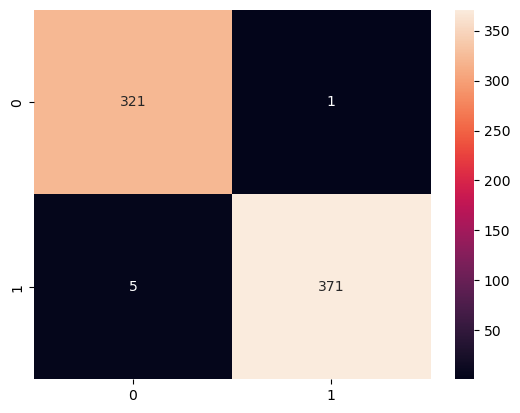

In [23]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot = True, fmt = 'd')

In [24]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       322
           1       1.00      0.99      0.99       376

    accuracy                           0.99       698
   macro avg       0.99      0.99      0.99       698
weighted avg       0.99      0.99      0.99       698

